# Vaje 5: Rezanje odločitvenih dreves in ansambli

## Naloga 1: Rezanje dreves

In [3]:
import numpy as np

np.random.seed(18)
X = np.random.random(size=(1000, 9))
y = 1 + X[:, 0] - 2* X[:, 4] + 5 * (X[:, 3] * X[:, 4] - X[:, 5]*X[:, 8]) + np.random.normal(scale=5)
y = y > y.mean() 

1.a: Preveri točnost odločilnih dreves na napovednih spremenljivkah $X$ in ciljnih vrednostih $y$.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import KFold


kf = KFold(shuffle= True)
acc = []

for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    model = DecisionTreeClassifier()
    tree = model.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

print(acc)
print('povprecje:', np.mean(acc))



[0.895, 0.88, 0.875, 0.835, 0.91]
povprecje: 0.8789999999999999


1.b: S sprotnim rezanjem poskrbi, da se naučen napovedn model ne bo preprilegal podatkom. Uporabi parameter `min_samples_split`, ki določi najmanjše število primerov v listu pri katerem se list naprej deli.

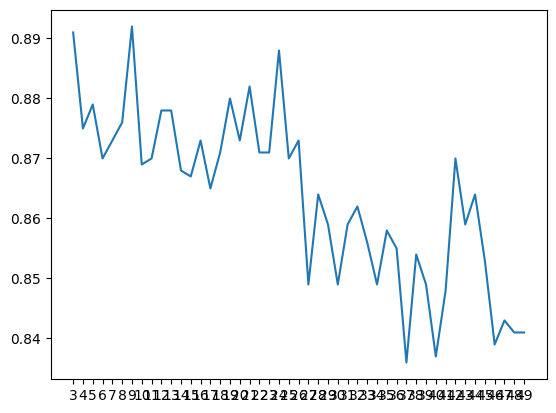

In [22]:
import matplotlib.pyplot as plt

accuracy = []

for min_samples_split in range(3, 50):
    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = DecisionTreeClassifier(min_samples_split=min_samples_split)
        tree = model.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
    
    accuracy.append(np.mean(acc))


plt.plot(accuracy)
plt.xticks(list(range(47)),labels=range(3, 50))
plt.show()



1.c: Najdi ustrezno vrednost parametra cp (`ccp_alpha` v sklearn) za naknadno rezanje odločitvenega drevesa.

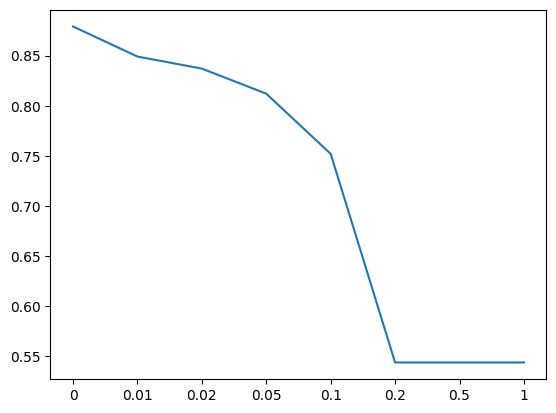

In [25]:

accuracy = []

for ccp in [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = DecisionTreeClassifier(ccp_alpha=ccp)
        tree = model.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
    
    accuracy.append(np.mean(acc))


plt.plot(accuracy)
plt.xticks(list(range(8)),labels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
plt.show()



## Naloga 2: Naključni gozd

2.a: Na podatkih iz naloge 1 preizkusi točnost napovednega modela naključnega gozda. Preveri še kako dobro lahko točnost preverimo na OOB množici (parameter `oob_score` in atribut `oob_score_`).

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
   
</details>

In [31]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(shuffle= True)
acc = []
oob = []

for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    model = RandomForestClassifier(oob_score=True)
    tree = model.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))
    oob.append(tree.oob_score_)

print('acc:', acc)
print('povprecje acc:', np.mean(acc))

print('oob:', oob)
print('povprecje oob:', np.mean(acc))


acc: [0.93, 0.935, 0.92, 0.935, 0.915]
povprecje acc: 0.9269999999999999
oob: [0.92375, 0.92625, 0.92375, 0.91625, 0.9325]
povprecje oob: 0.9269999999999999


2.b: Nariši grafa, ki prikazujeta kako se točnost (in točnost na OOB množici) spreminjajo glede na število dreves (`n_estimators`) in parameter mtry (`max_features`)

c:\Users\Uporabnik\anaconda3\envs\ITIAP\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Uporabnik\anaconda3\envs\ITIAP\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Uporabnik\anaconda3\envs\ITIAP\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Uporabnik\anaconda3\envs\ITIAP\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Uporabnik\anaconda3\envs\ITIAP\Lib\site-packages\sklearn\ensemble\_

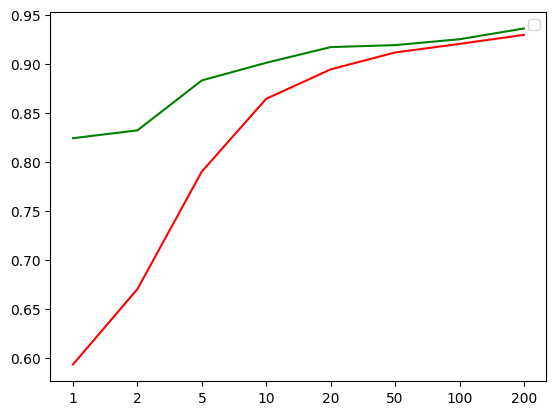

In [34]:

accuracy = []
oob_score = []

for num_trees in [1, 2, 5, 10, 20, 50, 100, 200]:

    kf = KFold(shuffle= True)
    acc = []
    oob = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = RandomForestClassifier(n_estimators=num_trees, oob_score=True)
        tree = model.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        oob.append(tree.oob_score_)


    accuracy.append(np.mean(acc))
    oob_score.append(np.mean(oob))


plt.plot(accuracy, c = 'g')
plt.plot(oob_score, c='r')
plt.xticks(list(range(8)),labels=[1, 2, 5, 10, 20, 50, 100, 200])
plt.show()



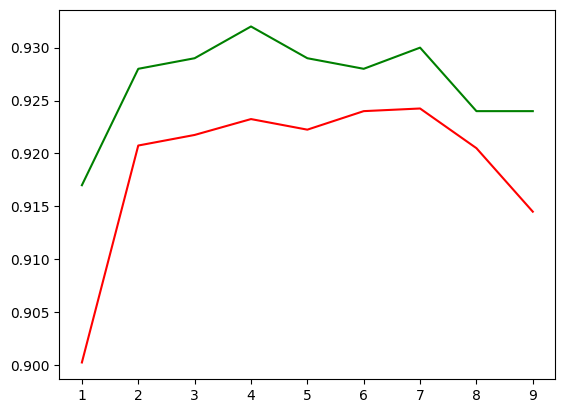

In [40]:

accuracy = []
oob_score = []

for max_feat in range(1, 10):

    kf = KFold(shuffle= True)
    acc = []
    oob = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = RandomForestClassifier(max_features=max_feat, oob_score=True)
        tree = model.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        oob.append(tree.oob_score_)


    accuracy.append(np.mean(acc))
    oob_score.append(np.mean(oob))


plt.plot(accuracy, c = 'g')
plt.plot(oob_score, c='r')
plt.xticks(list(range(9)),labels=range(1, 10))
plt.show()



2.c: Natreniraj model naključnega gozda na vseh podatkih, preveri njegovo točnost na OOB množici in poglej relevantnost spremenljivk (atribut `feature_importances_`). Se relevantnost spremenljivk ujema z definicijo ciljne funkcije $1 + X_1 - 2* X_5 + 5 * (X_4 * X_5 - X_6*X_9)$?

In [41]:
model = RandomForestClassifier(oob_score=True).fit(X, y)
print(f"Accuracy on OOB set: {model.oob_score_}")
for i in range(len(model.feature_importances_)):
    print(f"Feature {i+1}, importance {model.feature_importances_[i]}")

Accuracy on OOB set: 0.931
Feature 1, importance 0.05835875148868243
Feature 2, importance 0.027168335802828823
Feature 3, importance 0.03227660143394814
Feature 4, importance 0.19354683841382087
Feature 5, importance 0.06816363639653537
Feature 6, importance 0.27363613127897757
Feature 7, importance 0.0345539669957683
Feature 8, importance 0.03085062607964304
Feature 9, importance 0.2814451121097956


## Naloga 3: Vrečenje (Bagging)

3.a: Preizkusi model vrečenja z modelom odločitvenega drevesa. Kako se model primerja z modelom naključnega gozda?

In [43]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Mean accuracy", np.mean(accuracies))
print(accuracies)

Mean accuracy 0.914
[0.92, 0.91, 0.915, 0.9, 0.925]


3.b: Na podoben način lahko vrečimo tudi druge modele. Preveri točnost ansambla, ki ga sestavimo iz modelov podpornih vektorjev in ansambel modelov logistične regresije. Kako se točnost ansambla primerja z posameznim modelom podpornih vektorjev/logistične regresije?

In [44]:
from sklearn.svm import SVC

kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = BaggingClassifier(estimator=SVC(), n_estimators=100).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Mean accuracy", np.mean(accuracies))
print(accuracies)

Mean accuracy 0.95
[0.955, 0.95, 0.93, 0.975, 0.94]
